Filtered DataFrame:
      Sınıf 9 Notu  Sınıf 10 Notu  Sınıf 11 Notu  pas1  pas2  pas5  pas7  \
0              3.0            NaN            NaN   3.0   3.0   2.0   2.0   
1              2.0            NaN            NaN   3.0   4.0   4.0   2.0   
2              2.0            NaN            NaN   4.0   4.0   2.0   4.0   
3              3.0            NaN            NaN   3.0   3.0   4.0   1.0   
4              1.0            NaN            NaN   3.0   4.0   3.0   3.0   
...            ...            ...            ...   ...   ...   ...   ...   
1002           5.0            5.0            5.0   2.0   2.0   3.0   3.0   
1003           4.0            4.0            4.0   3.0   4.0   1.0   3.0   
1004           5.0            4.0            4.0   2.0   2.0   4.0   2.0   
1005           5.0            4.0            5.0   1.0   2.0   4.0   1.0   
1006           5.0            5.0            5.0   1.0   2.0   5.0   1.0   

      pas10  pas13  pas15  ...  pas33  pas34  pas37  pas38  pas39  

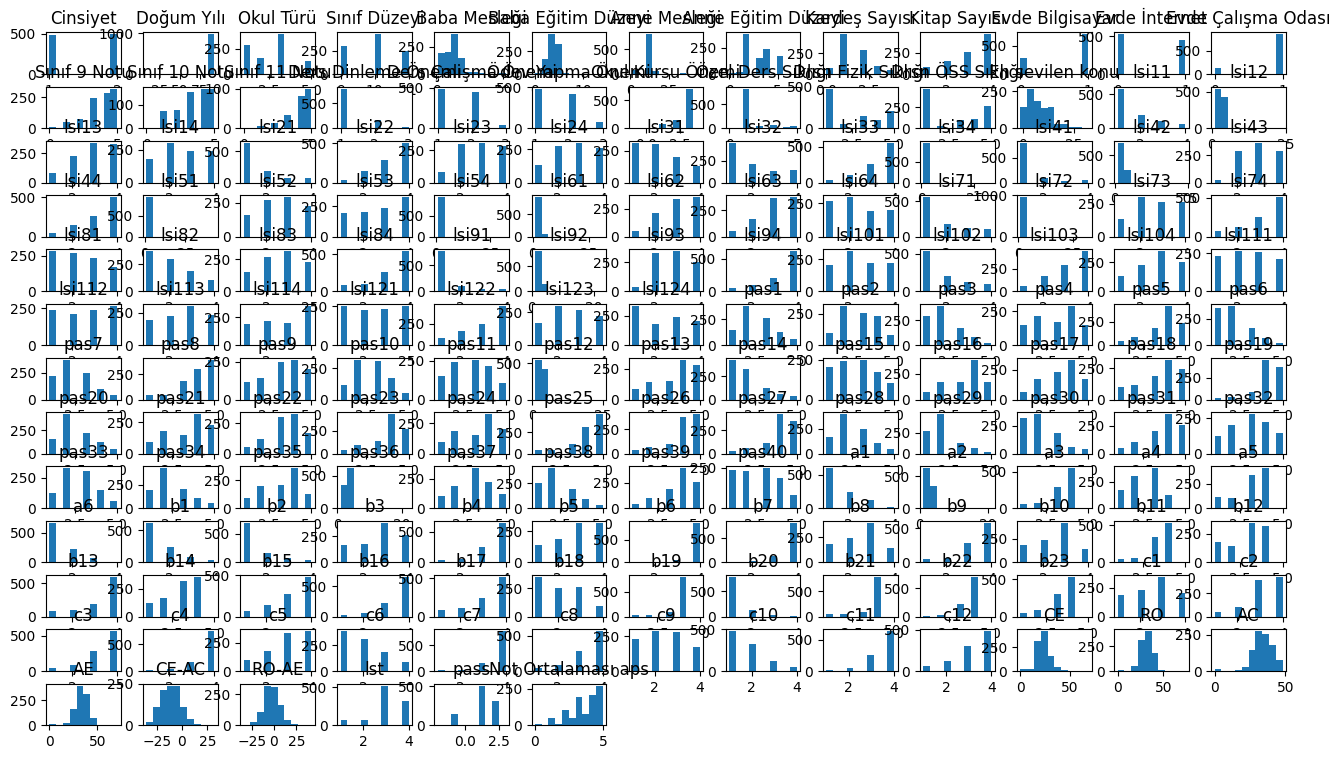

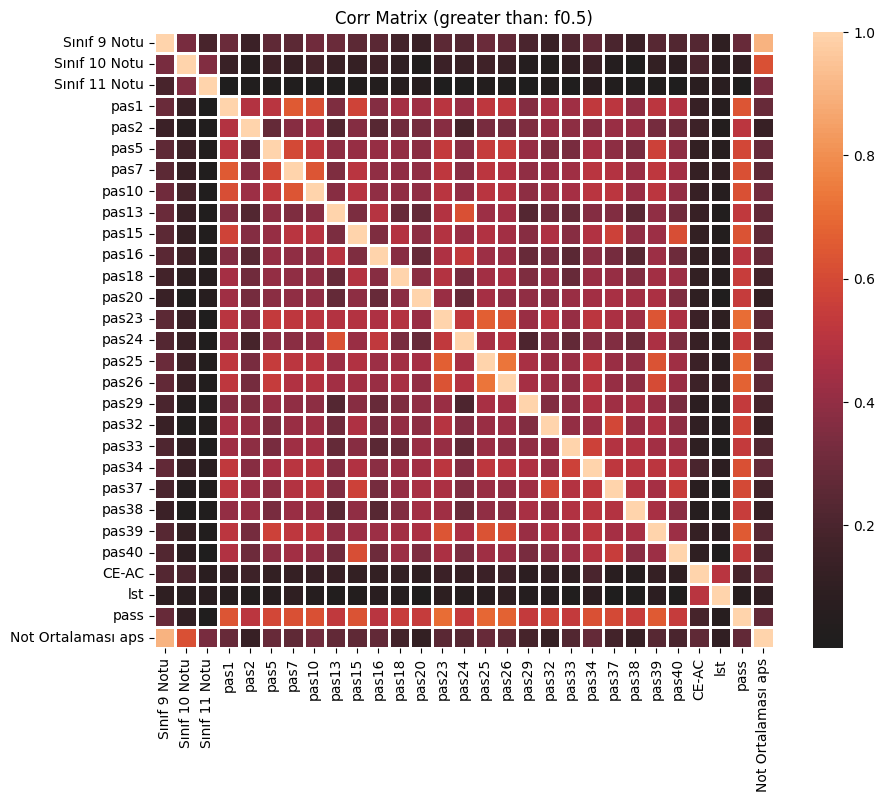

<Figure size 500x500 with 0 Axes>

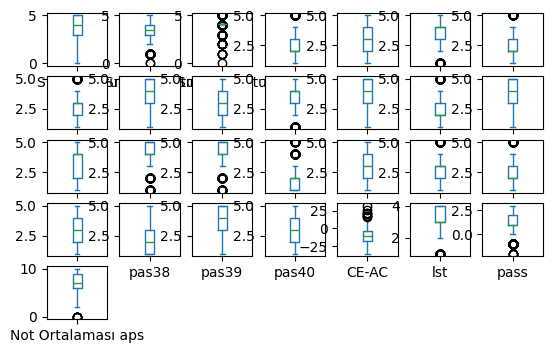

In [1]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# 24.04.2024 - HÃ¼seyin Sezerol
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Libs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.exceptions import ConvergenceWarning


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


import time

df = pd.read_excel(r"Dataset ML.xls")
df = df.drop(columns=["Öğrenci No"])
df = df.dropna(subset=['Not Ortalaması aps'])
df = df.dropna(subset=['pass'])
df = df.dropna(subset=['lst'])

warnings.filterwarnings("ignore")

column_to_move = "Not Ortalaması aps"
column_index = df.columns.get_loc(column_to_move) 
aps = df.iloc[:,column_index]
df = df.drop(columns=["Not Ortalaması aps"])
df = pd.concat([df,aps],axis=1)
column_pass = df.iloc[:,160:161]
column_pass = column_pass.to_numpy()
for p in range(978):
    row = column_pass[p]
    row = int(row[0])
    if 160 < row <= 200:
        row=5
    elif 120 < row <= 160:
        row=4
    elif 80 < row <= 120:
        row=3
    elif 40 < row <= 80:
        row=2
    elif 0 < row <= 40:
        row=1
    elif -40 <= row < 0:
        row=-1
    elif -80 <= row < -40:
        row=-2
    elif -120 <= row < -80:
        row=-3
    elif -160 <= row < -120:
        row=-4   
    elif -200 <= row < -160:
        row=-5
    column_pass[p] = [row]
df["pass"] = column_pass
data = df
X = data.iloc[:,:159]
Y = data.iloc[:,159:]

data.hist(bins=10,figsize=(16,9),grid=False)

correlation_matrix = data.corr()

correlation_with_target1 = correlation_matrix['lst'].abs().sort_values(ascending=False)
correlation_with_target2 = correlation_matrix['pass'].abs().sort_values(ascending=False)
correlation_with_target3 = correlation_matrix['Not Ortalaması aps'].abs().sort_values(ascending=False)

threshold = 0.5

columns_to_drop_target1 = correlation_with_target1[correlation_with_target1 < threshold].index
columns_to_drop_target2 = correlation_with_target2[correlation_with_target2 < threshold].index
columns_to_drop_target3 = correlation_with_target3[correlation_with_target3 < threshold].index

columns_to_drop = set(columns_to_drop_target1).intersection(columns_to_drop_target2)
columns_to_drop = set(columns_to_drop).intersection(columns_to_drop_target3)

df_filtered = data.drop(columns=columns_to_drop)
print("Filtered DataFrame:")
print(df_filtered)

nan_values = df_filtered.isna()  
mean_values = df_filtered.mean() 
df_filled = df_filtered.fillna(mean_values) 

print("\n fill DataFrame:")
print(df_filled)
df_filtered = df_filled
df_filtered['Not Ortalaması aps'] = (df_filtered['Not Ortalaması aps'] * 2).astype(int)

df_filtered.to_csv("12_LearningStyles_Dataset.csv", index=False)

plt.figure(figsize=(10, 8))
corr2=np.abs(df_filtered.corr(method='pearson'))
sns.heatmap(corr2, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.figure(figsize=(5, 5))
df_filtered.plot(kind='box', subplots=True, layout=(6,7), sharex=False, sharey=False)

datas=pd.read_csv('12_LearningStyles_Dataset.csv')
inputs = datas.iloc[:,:26]
output_columns = ["lst","pass","aps"]


#classification

for index in range(0,3):
    output = datas.iloc[:,(index+26):(index+27)]
    filename=output_columns[index]
    print(filename)
   
    # Separate data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2,train_size=0.8, random_state=47,shuffle=True)

    #Loading the models to be tried
    models = []
    
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ExtraT', ExtraTreesClassifier()))
    models.append(('RndFor', RandomForestClassifier()))
    
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('MLP',MLPClassifier()))
    models.append(('GaussNB',GaussianNB()))
    
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('GRBoost',GradientBoostingClassifier()))
    
    #models.append(('GaussPC',GaussianProcessClassifier()))
    
    models.append(('LogisR', LogisticRegression()))
    
    models.append(('sgd',SGDClassifier()))
    
    
    #models.append(( 'histgb',HistGradientBoostingClassifier()))

    #SVR
    models.append(('SVC-Linear', SVC(kernel="linear")))
    models.append(('SVC-RBF', SVC(kernel='rbf')))
    models.append(('SVC-Sigmoid', SVC(kernel="sigmoid")))
    models.append(('SVC-Poly2', SVC(kernel="poly",degree=2)))
    models.append(('SVC-Poly3', SVC(kernel="poly",degree=3)))
    
    #ANN
    models.append(('ANN-lbfgs',MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    models.append(('ANN-sgd',MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    models.append(('ANN-adam',MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    
    #Boosting
    #models.append(('xgb',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8)))
    #models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
    #models.append(('catb',CatBoostRegressor(verbose=False)))
    
    #Testing models
    num_folds = 10
    results = {}

    start_time0 = time.time()
    for name, model in models:
        start_time = time.time()
        
        skfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=47)
        cv_results = cross_val_score(model, x_train, y_train, cv=skfold, scoring="accuracy")
        
        mean_accuracy = cv_results.mean()
        
        model.fit(x_train, y_train)
        test_accuracy = model.score(x_test, y_test)
        results[name] = test_accuracy
        
        
        print(f"{name} CV - acc :  {mean_accuracy:.16f}")
        print(f"{name} test-acc :  {test_accuracy:.16f}")
        
       
        end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} saniye\n")
        
    end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"{elapsed_time} saniye")
        

    print(f"\n{filename}")

    best_model = max(results, key=results.get)
    print("best dependOnTest: ", best_model)


    models_dict = dict(models)
    # Train the best model
    best_model_instance = models_dict.get(best_model)
    best_model_instance.fit(x_train, y_train)

    # Evaluate the performance of the best model on the test set
    test_accuracy = best_model_instance.score(x_test, y_test)
    print("Test set test-acc (best model):", test_accuracy)

    # Calculate evaluation metrics for the best model
    y_pred = best_model_instance.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Print the evaluation metrics for the best model
    print("\nEvaluation metric scores for best model which is {}:".format(best_model))
    print("Test set accuracy:", test_accuracy)
    print("Test set precision:", precision)
    print("Test set recall:", recall)
    print("Test set F1 score:", f1)
 
    import pickle

  
    best_model = max(results, key=results.get)
    print("Best model:", best_model)

    
    best_model_instance = models_dict.get(best_model)

    with open(f'{filename}best_model.pkl', 'wb') as f:
        pickle.dump(best_model_instance, f)

    print("\n")
